In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets
%matplotlib inline
np.random.seed(1)

In [3]:
# data is sotred order to rows , and this means that one row is one data  plt.cm.Spectral
X,Y=load_planar_dataset()
shape_X=X.shape
shape_Y=Y.shape
#plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral);
#print(X)
xx=np.array([[2,3],[3,2],[3,3]])
print(xx.shape)
print(X.shape)
print(type(X))
m=shape_X[1]
m0=shape_X[0]
print(shape_X)
print(type(shape_X))
print(m)
print(m0)

(3, 2)
(2, 400)
<class 'numpy.ndarray'>
(2, 400)
<class 'tuple'>
400
2


# simple logistic regression

C:\Love\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 47%


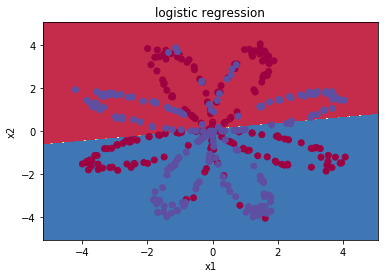

In [4]:
# train the logisitic Regression classfier, 
#this seem like that i do not need to write the simoid，optimize function anymore..
# this is load a linear model to train the non-linera data, and actually the result is not good.
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

plot_decision_boundary(lambda x: clf.predict(x),X,Y)
plt.title("logistic regression")
LR_prediction=clf.predict(X.T)
print("accuracy %d"%float((np.dot(Y,LR_prediction)+np.dot(1-Y,1-LR_prediction))/float(Y.size)*100)+"%")


we can know that LR is not feet to the above data(non-linear), so we need train a net with a single hidden layer.

# 4 Neural Network model

1. define the input , layer 
2. initialize the parameters
3. Loop
   - forwoard propagation
   - compute loss
   - backwoard propagation to get the gradients
   - update params
   

# 4.1 define the network struture

In [5]:
def layer_sizes(X,Y):
    """
    Argument:
    X --- input dataset of Shape.
    Y --- labels of shape
    
    returns:
    n_x --- the size of input layer
    n_h -- the size of layer
    n_y -- the size of output layer
    
    """
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [6]:
X_assess,Y_assess=layer_sizes_test_case()
(n_x,n_h,n_y)=layer_sizes(X_assess,Y_assess)
print("the size of input layer is : n_x= ",n_x)
print("the size of hidden layer is : n_h= ",n_h)
print("the size of output layer is : n_y= ",n_y )

the size of input layer is : n_x=  5
the size of hidden layer is : n_h=  4
the size of output layer is : n_y=  2


## 4.2 initialize the model's parameters

initialize the weights matrices with random values


In [20]:
import numpy as np
def initialize_parameters(n_x,n_h,n_y):
    """
    arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the out layer
    
    returns:
    params -- python dictionay 
               w1 -- (n_h,n_x)
               b1 -- (n_h,1)
               W2 -- (n_y,n_h)
               b2 -- (n_y, 1)
    
    """
    np.random.seed(2)
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters


In [25]:
n_x,n_h,n_y=initialize_parameters_test_case()
print('n_x= ',n_x,'  ','W1= ',(n_h,n_x))
print('n_h= ',n_h,' ','W2= ',(n_y,n_h))
print('b1= ',(n_h,1))
print('b2= ',(n_y,1))
print('n_y= ',n_y)
parameters=initialize_parameters(n_x,n_h,n_y)
print('W1= '+str(parameters["W1"]))
print("b1= ",str(parameters["b1"]))
print("W2= ",str(parameters["W2"]))
print("b2= ",str(parameters["b2"]))

n_x=  2    W1=  (4, 2)
n_h=  4   W2=  (1, 4)
b1=  (4, 1)
b2=  (1, 1)
n_y=  1
W1= [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1=  [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2=  [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2=  [[ 0.]]


### 4.3 the loop

implement forward_propgation()
we have implemented :
- mine sigmoid()
- system numpy---np.tanh()  

we will finish():
- retrieve each parameters from the dictionary parameters 
- forward propagation


In [46]:
def forward_propagation(X,parameters):
    """
    Argument:
    X --- input data of size(n_x,m)
    parameters -- python dictionary containing my parameters
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- a dictionary containing Z1, A1, Z2, A2
    
    """
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    # calculate A2 probabilities
    """
    wrong......
     Z1=W1*X
    A1=X
    Z2=W2*Z1+b2
    A2=Z1
    """
    #  Z3=W1*X  is wrong ,we shoud use np.dot(W1*X), * only can do operators when 
    # the shape is same.
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    
    assert(A2.shape==(1,X.shape[1]))
    cache={
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2,cache

In [47]:
X_assess,parameters=forward_propagation_test_case()
print(X_assess)
A2,cache=forward_propagation(X_assess,parameters)
print(cache['Z1'])
print(np.mean(cache['Z1']),np.mean(cache['A1']),np.mean(cache['Z2']),
     np.mean(cache['A2']))

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
[[-0.00616586  0.0020626   0.0034962 ]
 [-0.05229879  0.02726335 -0.02646869]
 [-0.02009991  0.00368692  0.02884556]
 [ 0.02153007 -0.01385322  0.02600471]]
-0.000499755777742 -0.000496963353232 0.000438187450959 0.500109546852


compute the value of the cost J  
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [55]:
def compute_cost(A2,Y,parameters):
    """
    cross-entropy cost
    Arguments:
    A2 --- sigmoid output of the second activation, of shape(1, number of examples)
    Y --- true labels vector of shape(1,number of exmples)
    parameters -- dictionary containing your parameters W,b1,W2,b2.
    
    Returns:
    cost -- cross-entropy cost given above
    """
    
    m=Y.shape[1]  # numbers of shape
    #compute the cross-entropy cost
    logprobs=np.multiply(np.log(A2),Y)+np.multiply((1-Y),np.log(1-A2))
    cost=-1/m*np.sum(logprobs)
    cost=np.squeeze(cost)
    
    assert(isinstance(cost,float))
    return cost

In [56]:
A2,Y_assess,parameters=compute_cost_test_case()
print("cost= ",str(compute_cost(A2,Y_assess,parameters)))

cost=  0.692919893776


using the cache above, we can now implement the backward propagation
instructions: 


In [88]:
def backward_propagation(parameters,cache,X,Y):
    """
    implement the backward propagation using the instructions above.
    Argument:
    parameter-- dictionary above.we need update this part.
    cache --- a dictionary containing Z1 , A1, Z2 , A2
    X -- input data of shape (2,number of examples)
    Y -- ture label vector (1,nmuber of examples)
    
    return :
    grads -- python dictionary your gradients with respect to different parameters
    
    """
    m=X.shape[1]
    W1=parameters['W1']
    W2=parameters['W2']
    
    A1=cache['A1']
    A2=cache['A2']
    
    #backward propogation: dw1, db1, dw2, db2
    # so dz2 and dz1 is "cache "
    dZ2=A2-Y
    dW2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    #dZ1=W2.T*dZ2*(1-np.power(A1,2))
    #dZ1=dZ2*W2.T*(1-np.power(A1,2))
    dW1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2,
        "A1":A1,
        "A2":A2
        
    }

    return grads

In [92]:
parameters,cache,X_assess,Y_assess=backward_propagation_test_case()
grads=backward_propagation(parameters,cache,X_assess,Y_assess)
print(Y_assess)
print(grads["A1"])
print(grads["A2"])
print('W2',parameters["W2"])
print(1-np.power(grads["A1"],2))
print("dW1=",grads["dW1"])
print("db1=",grads["db1"])
print("dW2=",grads["dW2"])
print("db2=",grads["db2"])

[[ 1.74481176 -0.7612069   0.3190391 ]]
[[-0.00616578  0.0020626   0.00349619]
 [-0.05225116  0.02725659 -0.02646251]
 [-0.02009721  0.0036869   0.02883756]
 [ 0.02152675 -0.01385234  0.02599885]]
[[ 0.5002307   0.49985831  0.50023963]]
W2 [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
[[ 0.99996198  0.99999575  0.99998778]
 [ 0.99726982  0.99925708  0.99929974]
 [ 0.9995961   0.99998641  0.9991684 ]
 [ 0.9995366   0.99980811  0.99932406]]
dW1= [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1= [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2= [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2= [[ 0.06589489]]


###  now we start to implement the update parameters. 

use dW2,db1,dW2,db2 to update(W1,b2,W2,b2)  


In [118]:
def update_parameters(parameters,grads,learning_rate=1.2):
    """
    parameters:
    update ---- parameters using the gradient descent update our parameters
    grads -- python dictionary containing our gradients
    
    returns:
    parameters -- dictionary containing our updated parameter
    """
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads['db2']
    # should add the learning rate!!!!!!!!!!!!!!!!!!!!!
    W1 -= dW1*learning_rate
    b1 -= db1*learning_rate
    W2 -= dW2*learning_rate
    b2 -= db2*learning_rate
    
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

In [119]:
parameters,grads=update_parameters_test_case()
parameters=update_parameters(parameters,grads)
print("W1= ",str(parameters["W1"]))
print("b1= ",str(parameters["b1"]) )
print("W2= ",str(parameters["W2"]))
print("b2=",str(parameters["b2"]))

W1=  [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1=  [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2=  [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2= [[ 0.00010457]]


### 4.2 integrate parts 4.1 4.2 and 4.3 in nn_model()

In [120]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    arguments:
    X --- dataset of shape(2,number of examples)
    Y --- labels of shape(1, number of examples)
    n_h -- size of hidden layer
    num_iterations -- number of iterations in gradient descent loop
    print_cost -- if true, print the cost every 1000 iterations
    
    returns:
    parameters -- parameters weights + bias
    
    """
    # initialize the input and cells 
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    for i in range(0,num_iterations):
        #forward propagation
        A2,cache=forward_propagation(X,parameters)
        #cost fucntion
        cost=compute_cost(A2,Y,parameters)
        #backford compute the grads we need 
        grads=backward_propagation(parameters,cache,X,Y)
        #update the parameters
        parameters=update_parameters(parameters,grads)
        
        if print_cost and i%1000 == 0:
            print("cost after iteration %i:%f"%(i,cost))
    return parameters

In [121]:
X_assess,Y_assess=nn_model_test_case()
parameters=nn_model(X_assess,Y_assess,4,num_iterations=10000,print_cost=True)
print("W1= ",str(parameters["W1"]))
print("b1= ",str(parameters["b1"]))
print("W2= ",str(parameters["W2"]))
print("b2= ",str(parameters["b2"]))

# -inf?????what this,why????

cost after iteration 0:0.692584
cost after iteration 1000:-inf
cost after iteration 2000:-inf
cost after iteration 3000:-inf
cost after iteration 4000:-inf


C:\Love\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log
E:\study_series\tensorflow\andrew_class\blog-master\wcs\class2\planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


cost after iteration 5000:-inf
cost after iteration 6000:-inf
cost after iteration 7000:-inf
cost after iteration 8000:-inf
cost after iteration 9000:-inf
W1=  [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1=  [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2=  [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2=  [[-52.66607704]]


### 4.5 predictions